In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
!pip install keras
from keras.utils import to_categorical
from PIL import Image 
import os
os.chdir('C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed')
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import random

In [9]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()
import os




In [10]:
cur_path

'C:\\Users\\satvi\\Downloads\\archive (4)\\gtsrb-preprocessed'

In [11]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles


allFiles = getListOfFiles(cur_path)

In [12]:
from tqdm import tqdm

# Rest of your code
for i in tqdm(range(classes)):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/' + a)
            image = image.resize((32, 32))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)



100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [09:13<00:00, 12.87s/it]


In [15]:
data = np.array(data)
labels = np.array(labels)

In [16]:
# Save the data and labels arrays with unique filenames
np.save('C:/Users/satvi/Downloads/JPPY2135-Traffic Sign Board Recognition and Voice Alert/training_data.npy', data)
np.save('C:/Users/satvi/Downloads/JPPY2135-Traffic Sign Board Recognition and Voice Alert/training_labels.npy', labels)

# Loading the data for training
data = np.load('C:/Users/satvi/Downloads/JPPY2135-Traffic Sign Board Recognition and Voice Alert/training_data.npy')
labels = np.load('C:/Users/satvi/Downloads/JPPY2135-Traffic Sign Board Recognition and Voice Alert/training_labels.npy')


In [17]:
print(data.shape, labels.shape)

(39209, 32, 32, 3) (39209,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [20]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [23]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

#base_model = ResNet50(weights='imagenet', input_shape=(32,32,3), include_top=False)
# base_model = VGG16(weights='imagenet', input_shape=(32,32,3), include_top=False)
base_model = VGG19(weights='imagenet', input_shape=(32,32,3), include_top=False)
# base_model = MobileNetV2(weights='imagenet', input_shape=(32,32,3), include_top=False)


# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(43, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

80134624/80134624 [==============================] - 2s 0us/step


In [24]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [25]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 896s 911ms/step - loss: 2.8526 - accuracy: 0.1671 - val_loss: 2.4030 - val_accuracy: 0.2555
Epoch 2/15
981/981 [==============================] - 926s 944ms/step - loss: 2.4246 - accuracy: 0.2564 - val_loss: 3.8412 - val_accuracy: 0.2339
Epoch 3/15
981/981 [==============================] - 1017s 1s/step - loss: 1.9655 - accuracy: 0.3453 - val_loss: 1.8006 - val_accuracy: 0.3801
Epoch 4/15
981/981 [==============================] - 1025s 1s/step - loss: 1.5040 - accuracy: 0.4695 - val_loss: 1.2460 - val_accuracy: 0.5705
Epoch 5/15
981/981 [==============================] - 982s 1s/step - loss: 1.1034 - accuracy: 0.6142 - val_loss: 1.0059 - val_accuracy: 0.6692
Epoch 6/15
981/981 [==============================] - 1214s 1s/step - loss: 0.9793 - accuracy: 0.6939 - val_loss: 0.7983 - val_accuracy: 0.7456
Epoch 7/15
981/981 [==============================] - 959s 978ms/step - loss: 0.5705 - accuracy: 0.8268 - val_loss: 0.5963 - val_accu

In [26]:
import pickle

pickle_location = 'C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed.pickle'
with open(pickle_location, 'wb') as file_pi:
     pickle.dump(history, file_pi, protocol=pickle.HIGHEST_PROTOCOL)
print("History saved to file: %s" % pickle_location)

filepath = 'traffic8.h5'
model.save('C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed')

filepath = 'weights8.h5'
model.save_weights('C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed')
model.save('C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed/traffic8.h5')

INFO:tensorflow:Assets written to: ram://0e2e0933-aaea-485b-98f7-f13fab6fd010/assets


INFO:tensorflow:Assets written to: ram://0e2e0933-aaea-485b-98f7-f13fab6fd010/assets


History saved to file: C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed.pickle


INFO:tensorflow:Assets written to: C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed\assets


INFO:tensorflow:Assets written to: C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed\assets


In [27]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


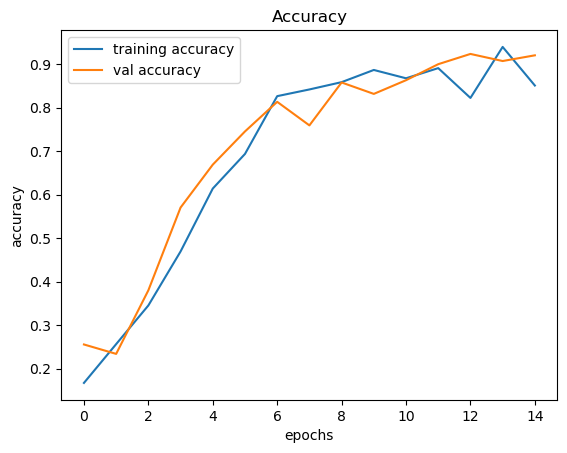

In [29]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

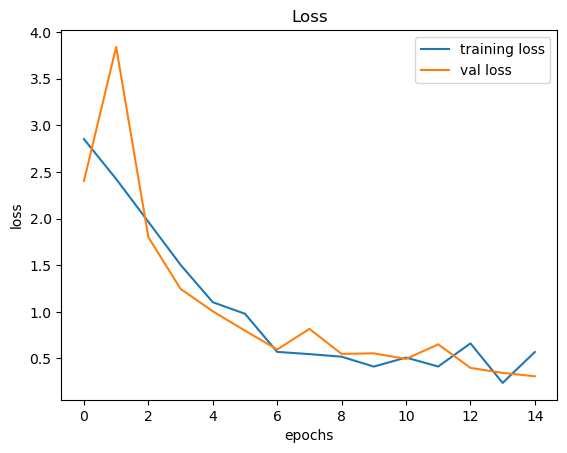

In [30]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [31]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score


# Make predictions on the test data
y_pred_probs = model.predict(X_test)
y_pred_classes = np.round(y_pred_probs)

# Convert the predicted probabilities to binary labels

# Calculate precision
precision = precision_score(y_test, y_pred_classes, average='micro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_classes, average='micro')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_classes, average='micro')
print("F1 score", f1)

246/246 [==============================] - 40s 161ms/step
Precision: 0.9489905787348587
Recall: 0.8991328742667687
F1 score 0.9233892090099528
